In [2]:
# Step 1: Set Up the Environment and Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set style
sns.set(style='whitegrid')

In [8]:
# Step 2: Load the Dataset
df = pd.read_csv('Zomato data .csv')  # Step 3: Clean and Prepare the Data
# 1. Convert Ratings
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])
df['rate'] = df['rate'].replace('NEW', np.nan).replace('-', np.nan)
df['rate'] = df['rate'].astype(float)
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [11]:
# Step 3: Clean and Prepare the Data
# 1. Convert Ratings
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])
df['rate'] = df['rate'].replace('NEW', np.nan).replace('-', np.nan)
df['rate'] = df['rate'].astype(float)

In [13]:
# 2. Verify Data Types and Null Values
print("\nData types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())


Data types:
 name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object

Null values:
 name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


In [15]:
# 3. Drop rows with null values
df.dropna(inplace=True)
print("\nAfter dropping nulls, shape:", df.shape)


After dropping nulls, shape: (148, 7)


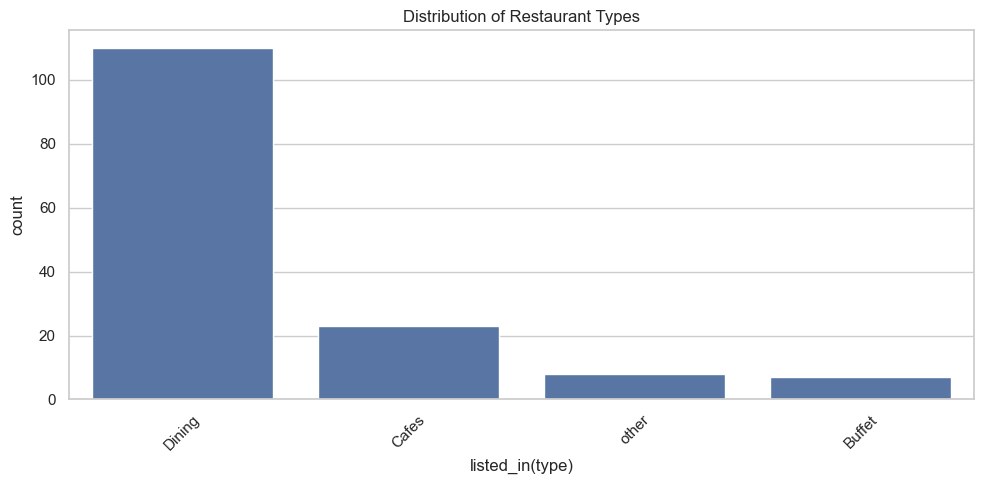

In [17]:
# Step 4: Data Analysis and Visualization

# Analysis 1: Types of Restaurants
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='listed_in(type)', order=df['listed_in(type)'].value_counts().index)
plt.title('Distribution of Restaurant Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

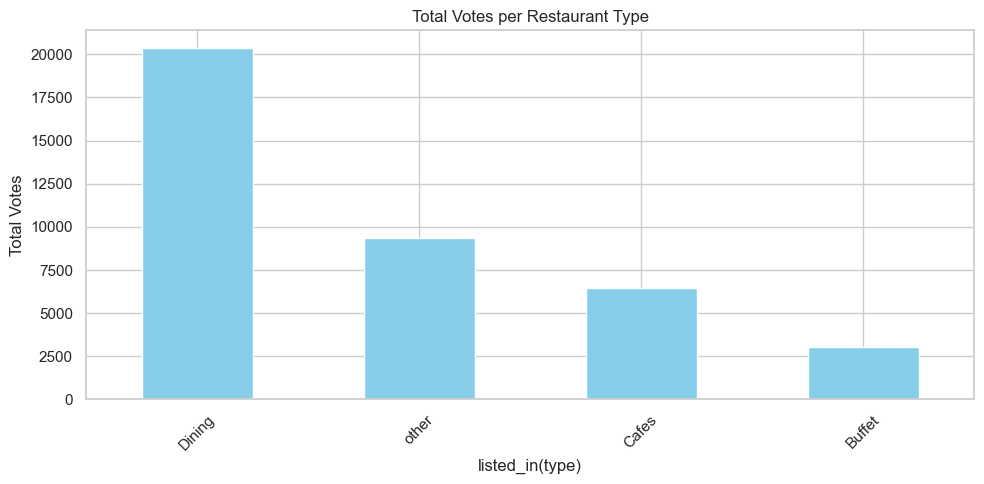

In [19]:
# Analysis 2: Votes by Restaurant Type
votes_by_type = df.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
votes_by_type.plot(kind='bar', color='skyblue')
plt.title('Total Votes per Restaurant Type')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

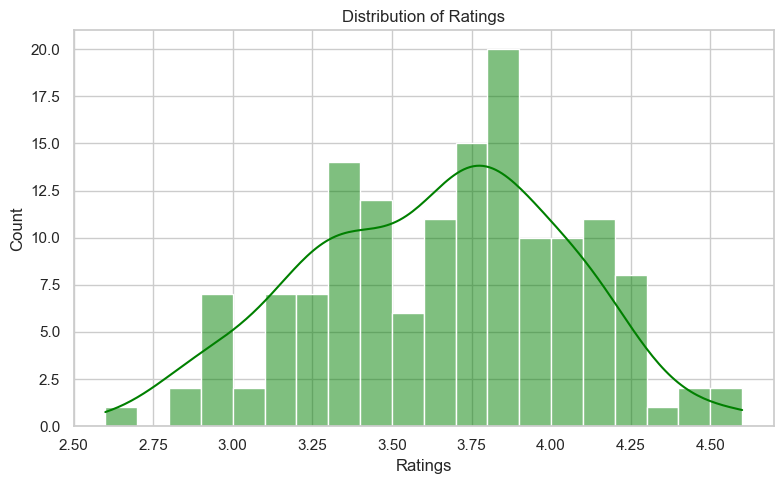

In [21]:
# Analysis 3: Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['rate'], bins=20, kde=True, color='green')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

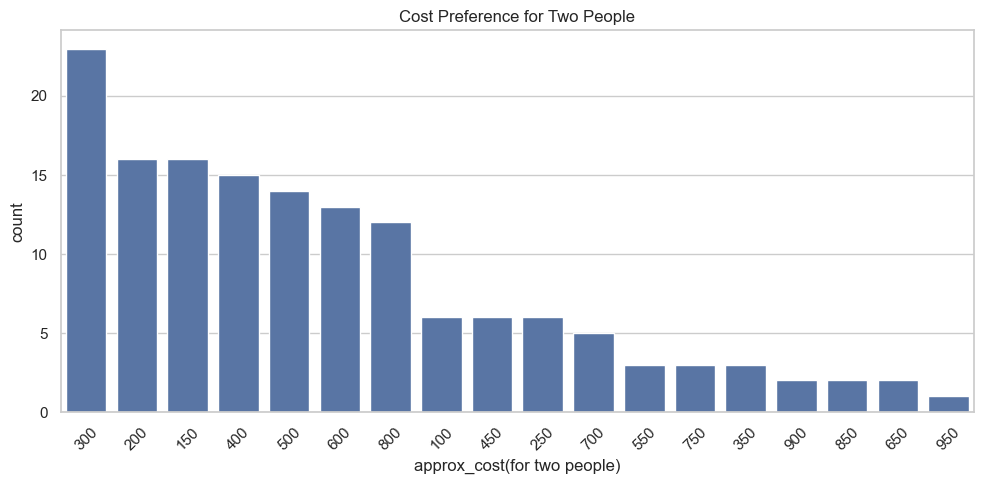

In [23]:
# Analysis 4: Restaurant Cost Preference for Couples
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='approx_cost(for two people)', order=df['approx_cost(for two people)'].value_counts().index)
plt.title('Cost Preference for Two People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

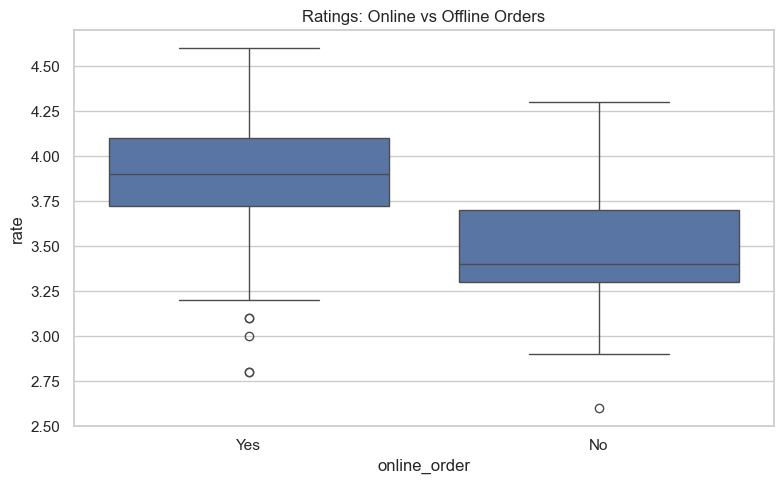

In [25]:
# Analysis 5: Online vs. Offline Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='online_order', y='rate')
plt.title('Ratings: Online vs Offline Orders')
plt.tight_layout()
plt.show()

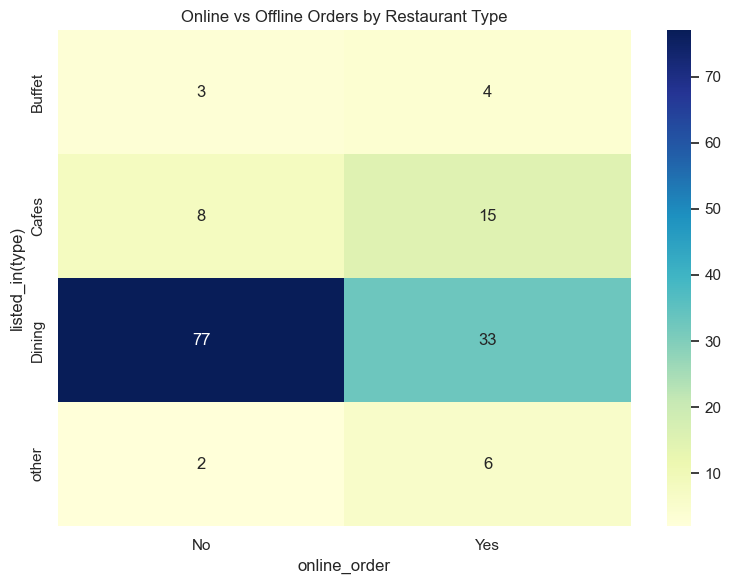

In [27]:
# Analysis 6: Online Orders by Restaurant Type
pivot = pd.pivot_table(df, index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Online vs Offline Orders by Restaurant Type')
plt.tight_layout()
plt.show()

In [31]:
# Step 7: Insights
print("\nInsights:")
# 1. Most common restaurant type
most_common_type = df['listed_in(type)'].value_counts().idxmax()
print(f"1) Most common restaurant type: {most_common_type}")

# 2. Total votes per restaurant type
print("\n2) Total votes by restaurant type:\n", votes_by_type)

# 3. Most common rating range
most_common_rating_range = df['rate'].between(3.5, 4.0).sum()
print(f"\n3) Restaurants with rating between 3.5 and 4.0: {most_common_rating_range} out of {len(df)}")


Insights:
1) Most common restaurant type: Dining

2) Total votes by restaurant type:
 listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64

3) Restaurants with rating between 3.5 and 4.0: 72 out of 148


In [33]:
# 4. Average spending of couples who order online
online_df = df[df['online_order'] == 'Yes']
avg_cost_online = online_df['approx_cost(for two people)'].mean()
print(f"\n4) Average cost for online orders (couples): ₹{avg_cost_online:.2f}")


4) Average cost for online orders (couples): ₹510.34


In [35]:
# 5. Mode with maximum rating
avg_rating_online = df[df['online_order'] == 'Yes']['rate'].mean()
avg_rating_offline = df[df['online_order'] == 'No']['rate'].mean()
mode_with_max_rating = 'Online' if avg_rating_online > avg_rating_offline else 'Offline'
print(f"\n5) Mode with maximum rating: {mode_with_max_rating}")


5) Mode with maximum rating: Online


In [37]:
# 6. Type with more offline orders
offline_counts = df[df['online_order'] == 'No']['listed_in(type)'].value_counts()
top_offline_type = offline_counts.idxmax()
print(f"\n6) Type with more offline orders: {top_offline_type}")


6) Type with more offline orders: Dining
